# Import necessary libraries 

In [23]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [3]:
df = pd.read_csv('Competition_Dataset.csv')
df.head(5)

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

   Latitude (Y)  Longitude (X)  
0   -122.425892      37.774599  
1   -122.425892      37.774599  
2   -122.424363      37.800414  
3   -122.426995      37.800873  
4   -122.438738      37.771541

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680826 entries, 0 to 680825
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Dates          680826 non-null  object 
 1   Category       680826 non-null  object 
 2   Descript       680826 non-null  object 
 3   DayOfWeek      680826 non-null  object 
 4   PdDistrict     680826 non-null  object 
 5   Resolution     680826 non-null  object 
 6   Address        680826 non-null  object 
 7   Latitude (Y)   680826 non-null  float64
 8   Longitude (X)  680826 non-null  float64
dtypes: float64(2), object(7)
memory usage: 46.7+ MB


from the info of the dataframe above there are no null values 

In [5]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'Latitude (Y)', 'Longitude (X)'],
      dtype='object')

# Data Visualisation

## Number of Crime and time

In [6]:
# Convert 'timestamp' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'])

# Extract date and hour
df['date'] = df['Dates'].dt.date
df['hour'] = df['Dates'].dt.hour
df['month_year'] = df['Dates'].dt.strftime('%m-%Y')
df['year'] = df['Dates'].dt.year

### Number of crimes per daytime

In [7]:
# Count crimes per hour
crime_by_hour = df.groupby('hour').size().reset_index(name='crime_count')
# Create histogram with adjustable bins
fig_1 = px.histogram(df, x='hour', nbins=12,  
                   title='Crime Traffic During the Day',
                   labels={'hour': 'Hour of the Day', 'count': 'Number of Crimes'},
                   color_discrete_sequence=['skyblue'])
fig_1.update_traces(marker=dict(line=dict(color='black', width=1.5)))
# Show plot
fig_1.show()

The crime rate is lower in the early hours of the morning 4-5 and the highest at 16-17 in the afternoon
Now lits check if it is consistnce in all the day by polting random day of each year

In [ ]:
# Create an empty DataFrame to store results
crime_by_hour_all = pd.DataFrame()

# Loop through each year from 2003 to 2016
for i in range(2003, 2016):
    day = str(i) + '-05-13'
    df_t = df[df['date'] == pd.to_datetime(day).date()]
    crime_by_hour = df_t.groupby('hour').size().reset_index(name='crime_count')
    crime_by_hour['year'] = str(i)
    crime_by_hour_all = pd.concat([crime_by_hour_all, crime_by_hour], ignore_index=True)

# Create interactive line plot
fig_2 = px.line(crime_by_hour_all, x='hour', y='crime_count', color='year',
              title='Crime Trends on May 13 Over the Years',
              labels={'hour': 'Hour of the Day', 'crime_count': 'Number of Crimes'},
              markers=True)

# Show plot
fig_2.show()

### Number of crimes per day

In [9]:
#Count number of crimes per day
crime_counts = df.groupby(['date']).size().reset_index(name='crime_count_day')

# Create interactive bar chart
fig_3 = px.line(crime_counts, x='date', y='crime_count_day',   
             title='Number of Crimes Per Day', 
             labels={'date': 'Date', 'crime_count_day': 'Number of Crimes'},
             markers=True )

# Show plot
fig_3.show()

There is a day with low number of crimes 2, this maybe outlier 

In [10]:
# Create interactive box plot
fig_4 = px.box(crime_counts, x='crime_count_day',
             title='Crime Count Per Day - Outlier Detection',
             labels={'crime_count_day': 'Number of Crimes Per Day'},
             boxmode='overlay')


# Rotate x-axis labels for better visibility
fig_4.update_layout(yaxis_title="Number of Crimes Per Day", xaxis_title="")

# Show plot
fig_4.show()

There is one that stand out 

### Number of crimes per DayOfWeek

In [36]:

# Count number of crimes per weekday
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_DayOfWeek_counts = df.groupby('DayOfWeek').size().reindex(cats) 
crime_DayOfWeek_counts

# Create interactive line plot
fig = px.line(crime_DayOfWeek_counts,   
             title='Number of Crimes Per Day of the Week', 
             labels={'DayOfWeek': 'Day of the Week', 'crime_count_DayOfWeek': 'Number of Crimes'},
             markers=True )

# Show plot
fig.show()

### Number of crimes per Month

Since the "day Vs the number of crimes" plot  is crowded we will look at the number  of crime per month 

In [11]:
# Count number of crimes per month
crime_counts_m = df.groupby('month_year').size().reset_index(name='crime_count_month')
crime_counts_m['month_year'] = pd.to_datetime(crime_counts_m['month_year'], format='%m-%Y')
crime_counts_m = crime_counts_m.sort_values('month_year')
crime_counts_m['month_year'] = crime_counts_m['month_year'].dt.strftime('%m-%Y')

# Create interactive bar chart
fig_4 = px.line(crime_counts_m, x='month_year', y='crime_count_month',   
             title='Number of Crimes Per Month', 
             labels={'date': 'Date', 'crime_count_month': 'Number of Crimes'},
             markers=True )

# Show plot
fig_4.show()

### Number of the crimes Vs the years

In [12]:
#Count number of crimes per day
crime_counts_y = df.groupby(['year']).size().reset_index(name='crime_count_year')

# Create interactive bar chart
fig_5 = px.line(crime_counts_y, x='year', y='crime_count_year',   
             title='Number of Crimes Per year', 
             labels={'year': 'Year', 'crime_count_year': 'Number of Crimes'},
             markers=True )

# Show plot
fig_5.show()

The numbers of crimes seem to be steady during the years with low fluctuation

## Number of Crime and Category

In [18]:
df['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'WEAPON LAWS', 'BURGLARY',
       'SUSPICIOUS OCC', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC',
       'TRESPASS', 'MISSING PERSON', 'KIDNAPPING', 'RUNAWAY', 'FRAUD',
       'DISORDERLY CONDUCT', 'ARSON', 'BRIBERY', 'EMBEZZLEMENT',
       'EXTORTION', 'BAD CHECKS', 'STOLEN PROPERTY', 'RECOVERED VEHICLE'],
      dtype=object)

In [13]:

crime_category_counts = df['Category'].value_counts().reset_index()
crime_category_counts.columns = ['Category', 'Count']

# Create an interactive pie chart
fig_6 = px.pie(crime_category_counts, 
             names='Category', 
             values='Count', 
             title='Crime Categories Distribution',
             hole=0.3)  # Adjust hole size for a donut-style pie chart

# Show plot
fig_6.show()


In [17]:
# Count number of crimes per month for each Category 
crime_trends  = df.groupby(['month_year', 'Category']).size().reset_index(name='crime_count')
crime_trends['month_year'] = pd.to_datetime(crime_trends['month_year'], format='%m-%Y')
crime_trends  = crime_trends .sort_values('month_year')
crime_trends ['month_year'] = crime_trends ['month_year'].dt.strftime('%m-%Y')

# Create interactive bar chart
fig_7 = px.line(crime_trends, x='month_year', y='crime_count', color='Category',
              title='Crime Trends by Category Over Time',
              labels={'month_year': 'Month-Year', 'crime_count': 'Number of Crimes'},
              markers=True)

# Show plot
fig_7.show()

Interesting notes :
- "VEHICLE THEFT" crimes had a drop in Nov 2005
- "LARCENY/THEFT" is the most number of crime that keeps rising 
- "DRUG/NARCOTIC" Also droped in 2009

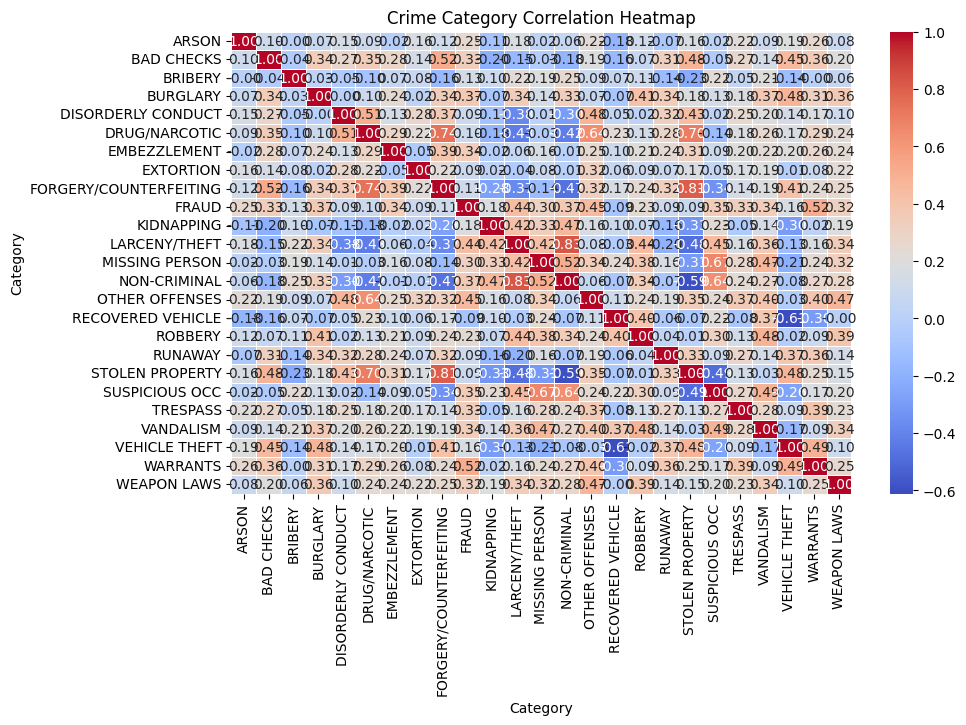

In [30]:


# Pivot the dataset to get crime counts per month for each category
crime_pivot = df.groupby(['month_year', 'Category']).size().unstack(fill_value=0)

# Compute correlation between crime categories
correlation_matrix = crime_pivot.corr()


# Plot heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Crime Category Correlation Heatmap")
plt.show()